In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [85]:
path = "./resources/Loan_Defaulter.csv"

In [86]:
oridf = pd.read_csv(path)

In [87]:
display(oridf.shape)
display(oridf.head())
display(oridf.tail(1))

(30204, 25)

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
30203,30000,50000,male,university,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,default


In [88]:
# Drop the redundant column header
oridf.columns = oridf.loc[0]
oridf = oridf.drop(index=0)
oridf = oridf.set_index("ID")

In [89]:
#Troubleshoting a bad row
oridf[oridf["LIMIT_BAL"]== "X1"]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


In [93]:
#Troubleshoting another bad row
oridf[oridf["LIMIT_BAL"]== "LIMIT_BAL"]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [94]:
oridf = oridf.drop(index = "ID")
oridf = oridf.drop(index = np.nan)

In [95]:
oridf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29997,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29998,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default


In [92]:
oridf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29997,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29998,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default


# Cleaned the data

In [72]:
oridf.isna().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [73]:
oridf.duplicated().sum()

236

In [74]:
# oridf[oridf.duplicated(keep=False)].sort_values(["LIMIT_BAL", "AGE"])
oridf[oridf.duplicated(keep=False)].sort_index()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
10,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default
10,20000,male,high school,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,not default
100,20000,male,university,1,38,0,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,360000,male,graduate school,1,43,-1,-1,-1,-1,-1,...,6451,26370,9956,8339,3394,12902,27000,0,68978,not default
98,150000,male,graduate school,2,27,0,0,0,0,0,...,89775,87725,40788,4031,10006,3266,4040,1698,800,not default
98,150000,male,graduate school,2,27,0,0,0,0,0,...,89775,87725,40788,4031,10006,3266,4040,1698,800,not default


In [75]:
# It seems none of the data is duplicated

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29997,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29998,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default


# Checking the dtypes

In [77]:
oridf.dtypes

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

# dividing the dataframe into a string version and a numeric version

In [97]:
# The numeric version of the dataframe
numericdf = oridf.drop(columns=["SEX", "EDUCATION", "default payment next month"])

In [79]:
numericdf

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,1,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,2,37,4,3,2,-1,0,0,3565,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [98]:
numericdf = numericdf.astype(int)

In [100]:
stringdf = oridf[["SEX", "EDUCATION", "default payment next month"]]

In [102]:
stringdf.head()

,SEX,EDUCATION,default payment next month
ID,,,
1,female,university,default
2,female,university,default
3,female,university,not default
4,female,university,not default
5,male,university,not default


In [99]:
numericdf.dtypes

0
LIMIT_BAL    int32
MARRIAGE     int32
AGE          int32
PAY_0        int32
PAY_2        int32
PAY_3        int32
PAY_4        int32
PAY_5        int32
PAY_6        int32
BILL_AMT1    int32
BILL_AMT2    int32
BILL_AMT3    int32
BILL_AMT4    int32
BILL_AMT5    int32
BILL_AMT6    int32
PAY_AMT1     int32
PAY_AMT2     int32
PAY_AMT3     int32
PAY_AMT4     int32
PAY_AMT5     int32
PAY_AMT6     int32
dtype: object

In [107]:
# merge doesnt work trying concat
pd.concat([stringdf, numericdf], axis="columns")

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,female,university,default,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,female,university,not default,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,female,university,not default,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,male,university,not default,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,not default,220000,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,male,high school,not default,150000,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,male,university,default,30000,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [108]:
tempdf = pd.concat([stringdf, numericdf], axis="columns")

In [109]:
# this df has a duplicate in it
tempdf

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,female,university,default,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,female,university,not default,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,female,university,not default,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,male,university,not default,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,not default,220000,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,male,high school,not default,150000,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,male,university,default,30000,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [110]:
tempdf.drop_duplicates(keep="first")

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,female,university,default,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,female,university,not default,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,female,university,not default,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,male,university,not default,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,not default,220000,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,male,high school,not default,150000,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,male,university,default,30000,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [111]:
tempdf = tempdf.drop_duplicates(keep="first")

In [112]:
cleandf = tempdf.copy()

---

### SAVEPOINT 1

In [114]:
savepoint1 = cleandf.copy()

# This is one of the cleaned versions

In [115]:
savepoint1

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,female,university,default,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,female,university,not default,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,female,university,not default,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,male,university,not default,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,not default,220000,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,male,high school,not default,150000,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,male,university,default,30000,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


# Data Analysis

In [120]:
sex = cleandf["SEX"].value_counts()

In [121]:
sex

SEX
female    18091
male      11874
Name: count, dtype: int64

In [122]:
education = cleandf["EDUCATION"].value_counts()
education

EDUCATION
university         14019
graduate school    10563
high school         4915
other                468
Name: count, dtype: int64

In [123]:
marriage = cleandf["MARRIAGE"].value_counts()
marriage

MARRIAGE
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

In [149]:
def get_color(df):
    lst = []
    string = "123456789ABCDEF"
    for i in range(len(df)):
        temp = random.choices(string, k = 6)
        temp = "".join(temp)
        temp = "#" + temp
        lst.append(temp)
    # print(temp)
    return lst
    

In [150]:
get_color(education)

['#5FBC4D', '#36267F', '#226262', '#91362B']

<Axes: title={'center': 'sex'}>

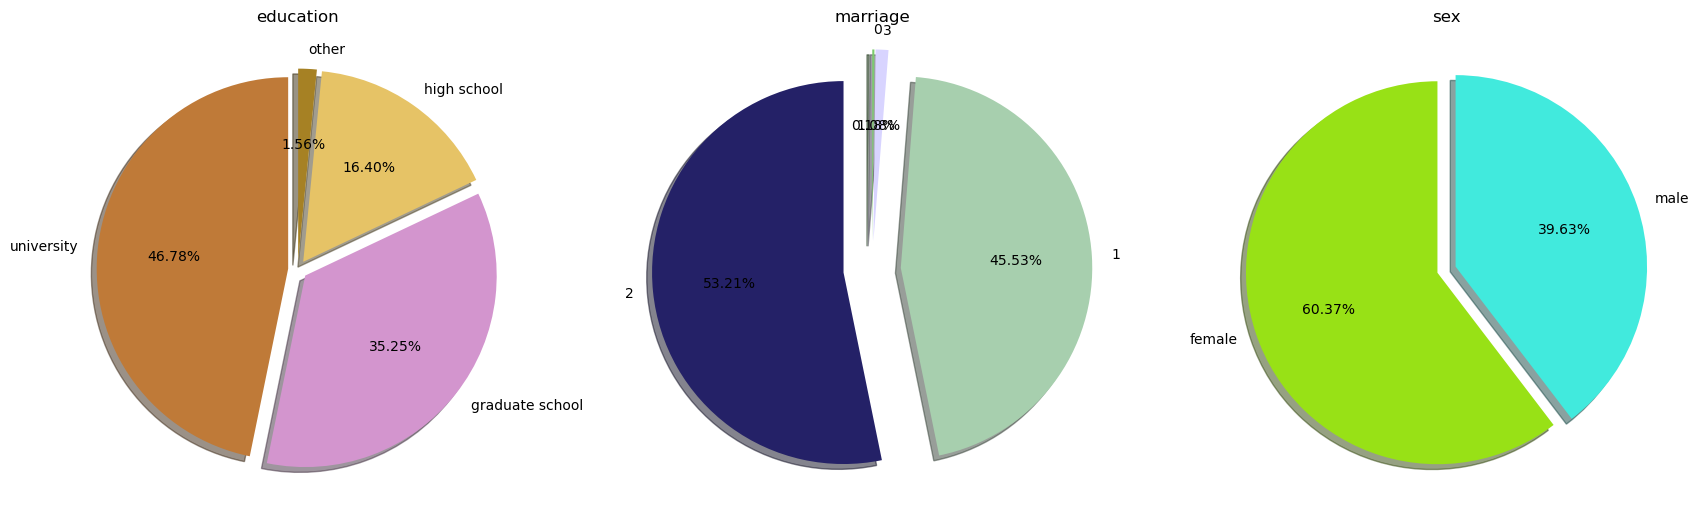

In [158]:
fig,axs = plt.subplots(1,3, figsize = (21,7))
education.plot(kind='pie', ax=axs[0], label = "", title="education",
               explode = [0.05,0.05,0.05,0.05], shadow = True,
               startangle = 90, autopct = "%.2f%%", colors=get_color(education))

# marriage.plot(kind='pie', ax=axs[1])
marriage.plot(kind='pie', ax=axs[1], label = "", title="marriage",
               explode = [0.15,0.15,0.15,0.15], shadow = True,
               startangle = 90, autopct = "%.2f%%", colors=get_color(marriage))

# sex.plot(kind='pie', ax=axs[2])
sex.plot(kind='pie', ax=axs[2], label = "", title="sex",
               explode = [0.05,0.05], shadow = True,
               startangle = 90, autopct = "%.2f%%", colors=get_color(sex))

<Axes: title={'center': 'sex'}, ylabel='SEX'>

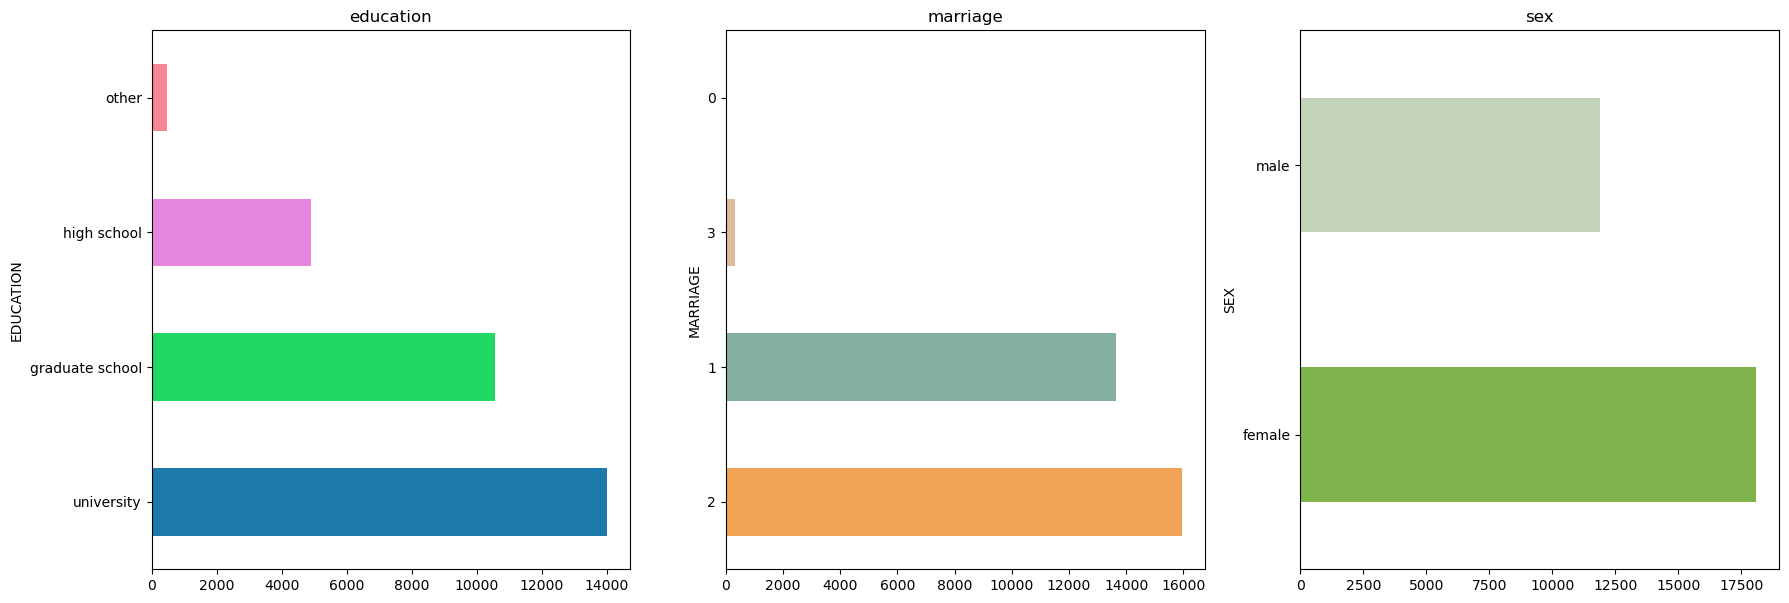

In [164]:
fig,axs = plt.subplots(1,3, figsize = (21,7))
education.plot(kind='barh', ax=axs[0], label = "", title="education", color=get_color(education))
marriage.plot(kind='barh', ax=axs[1], label = "", title="marriage", color=get_color(marriage))
sex.plot(kind='barh', ax=axs[2], label = "", title="sex", color=get_color(sex))

